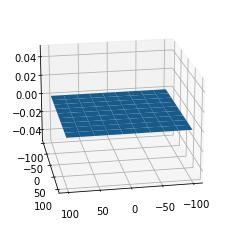

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

'''
Нужно найти точку пересечения точки
9955.0469
11020.8398
'''

# coefficients
A = -0.9469406171844665
B = 0.32140856791053607
C = 0
D = 5014234.421089979
#"{\"A\":-0.9469406171844665,\"B\":0.32140856791053607,\"C\":0.0,\"D\":5014234.421089979}"

# create a grid of points
x = np.linspace(-100,100,10)
y = np.linspace(-100,100,10)
x, y = np.meshgrid(x,y)

# calculate the z coordinates for each point on the plane
if C != 0:
    z = (D - A*x - B*y) / C
else:
    z = np.zeros_like(x) # Создание массива z такого же размера, что и x и y, заполненное нулями.

# create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)

# rotate the plot
ax.view_init(20, 80)

plt.show()
